In [1]:
import sys
import os
root_dir = os.getcwd().replace('/notebooks','')
sys.path.insert(1, root_dir)
import pandas as pd
import ast
import numpy as np
from datetime import datetime as dt
import glob
from zipline.utils.run_algo import load_extensions
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendar_utils import get_calendar
import os
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)
from zipline.data.bundles import register, unregister, ingest
from zipline.data.bundles.csvdir import csvdir_equities
from zipline.utils.calendar_utils import register_calendar, get_calendar

from zipline.api import (order, 
                         record, 
                         symbol,
                         get_datetime,
                         order_target_percent,
                         order_target_value,
                         set_benchmark,
                         get_open_orders)
from zipline import run_algorithm
from zipline.utils.calendar_utils import get_calendar
from zipline.api import order_target, record, date_rules, time_rules, symbol
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
import matplotlib.pyplot as plt

import quantstats as qs
import pyfolio as pf
import pandas as pd
import matplotlib.pyplot as plt

/home/mehedi/anaconda3/envs/fa1/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mehedi/anaconda3/envs/fa1/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/mehedi/anaconda3/envs/fa1/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mehedi/anaconda3/envs/fa1/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
bundle = 'snp500'
calendar_name = 'NYSE'
calendar = get_calendar(calendar_name)
bundle_data = bundles.load(bundle)
sids = bundle_data.asset_finder.sids
assets = bundle_data.asset_finder.retrieve_all(sids)
tickers = [coin.symbol for coin in assets]

In [3]:


def initialize(context):
    context.has_ordered = False
    context.asset = symbol('AAPL')
    #context.set_commission(commission.PerShare(cost=0.0075, min_trade_cost=1.0))
    

    


def handle_data(context, data):
    prices = data.current(context.asset, 'price')
    if not context.has_ordered:
        order(context.asset, 100)
        context.has_ordered = True
    
    


              

    

start = '2018-01-20'
end = '2023-03-27'
capital_base = 100000

results = run_algorithm(
    start=pd.Timestamp(start, tz='utc'),
    end=pd.Timestamp(end, tz='utc'),
    initialize=initialize,
    handle_data=handle_data,
    capital_base=capital_base,
    trading_calendar=calendar,
    bundle=bundle,
    data_frequency='daily'
)


NameError: name 'run_algorithm' is not defined

In [4]:
results

,period_open,period_close,transactions,positions,gross_leverage,starting_exposure,net_leverage,returns,ending_exposure,starting_value,...,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algo_volatility,benchmark_period_return,benchmark_volatility
2018-01-22 21:00:00+00:00,2018-01-22 14:31:00+00:00,2018-01-22 21:00:00+00:00,[],[],0.000000,0.0,0.000000,0.000000,0.0,0.0,...,NaN,0.000000,0.000000,0.0,0.0,1,2018-01,NaN,0.0,NaN
2018-01-23 21:00:00+00:00,2018-01-23 14:31:00+00:00,2018-01-23 21:00:00+00:00,"[{'amount': 100, 'dt': 2018-01-23 21:00:00+00:...","[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.044261,0.0,0.044261,-0.000023,4426.0,0.0,...,-11.224972,-0.000023,0.044261,0.0,0.0,2,2018-01,0.000260,0.0,0.0
2018-01-24 21:00:00+00:00,2018-01-24 14:31:00+00:00,2018-01-24 21:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.043587,4426.0,0.043587,-0.000705,4355.5,4426.0,...,-9.460749,-0.000728,0.044261,0.0,0.0,3,2018-01,0.006358,0.0,0.0
2018-01-25 21:00:00+00:00,2018-01-25 14:31:00+00:00,2018-01-25 21:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.042842,4355.5,0.042842,-0.000778,4277.8,4355.5,...,-11.383706,-0.001505,0.044261,0.0,0.0,4,2018-01,0.006706,0.0,0.0
2018-01-26 21:00:00+00:00,2018-01-26 14:31:00+00:00,2018-01-26 21:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.042937,4277.8,0.042937,0.000099,4287.7,4277.8,...,-9.511431,-0.001505,0.044261,0.0,0.0,5,2018-01,0.006718,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-21 20:00:00+00:00,2023-03-21 13:31:00+00:00,2023-03-21 20:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.142852,15740.0,0.142852,0.001689,15928.0,15740.0,...,0.951426,-0.050091,0.159977,0.0,0.0,1301,2023-03,0.032746,0.0,0.0
2023-03-22 20:00:00+00:00,2023-03-22 13:31:00+00:00,2023-03-22 20:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.141736,15928.0,0.141736,-0.001300,15783.0,15928.0,...,0.939682,-0.050091,0.159977,0.0,0.0,1302,2023-03,0.032739,0.0,0.0
2023-03-23 20:00:00+00:00,2023-03-23 13:31:00+00:00,2023-03-23 20:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.142583,15783.0,0.142583,0.000988,15893.0,15783.0,...,0.947732,-0.050091,0.159977,0.0,0.0,1303,2023-03,0.032729,0.0,0.0
2023-03-24 20:00:00+00:00,2023-03-24 13:31:00+00:00,2023-03-24 20:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.143597,15893.0,0.143597,0.001184,16025.0,15893.0,...,0.957448,-0.050091,0.159977,0.0,0.0,1304,2023-03,0.032720,0.0,0.0


In [5]:
results.to_csv('a.csv',index=True)

                           Strategy
-------------------------  ----------
Start Period               2018-01-22
End Period                 2023-03-27
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          11.4%
CAGR﹪                     1.45%

Sharpe                     0.65
Prob. Sharpe Ratio         93.12%
Smart Sharpe               0.61
Sortino                    0.94
Smart Sortino              0.88
Sortino/√2                 0.67
Smart Sortino/√2           0.63
Omega                      1.13

Max Drawdown               -5.01%
Longest DD Days            447
Volatility (ann.)          3.27%
Calmar                     0.29
Skew                       -0.03
Kurtosis                   3.43

Expected Daily %           0.01%
Expected Monthly %         0.17%
Expected Yearly %          1.82%
Kelly Criterion            6.04%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.33%
Expected Shortfall (cVaR)  -0.33%

Max Consecutive Wins       11

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2023-01-05,2023-03-27,447,-5.009111,-4.605675
2,2020-09-02,2020-09-18,2020-12-24,113,-2.508494,-2.482804
3,2020-02-13,2020-03-23,2020-06-04,112,-2.477839,-2.360444
4,2021-01-27,2021-03-08,2021-07-06,160,-2.438854,-2.109427
5,2018-10-04,2019-01-03,2019-10-10,372,-2.216556,-2.066911


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


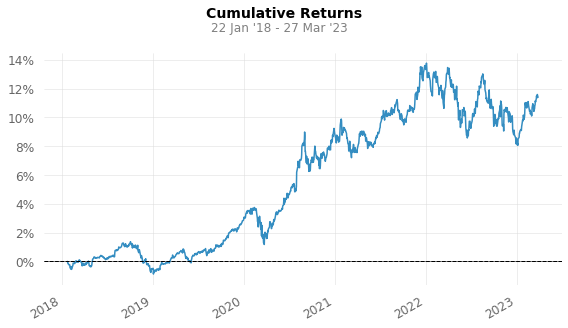

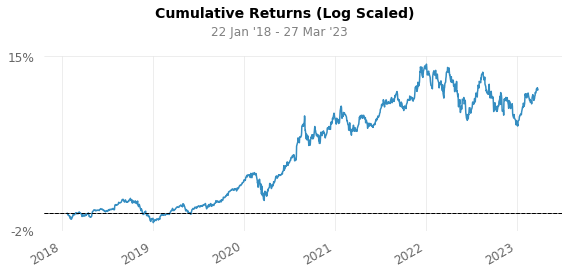

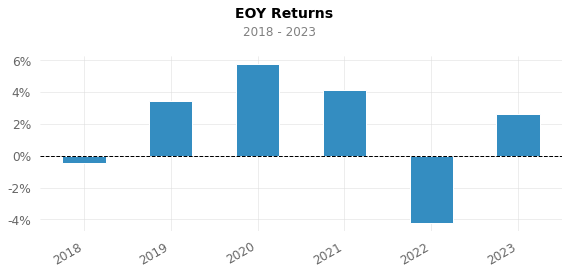

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


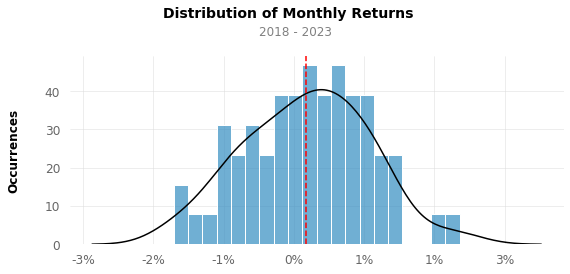

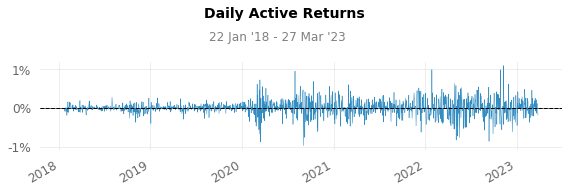

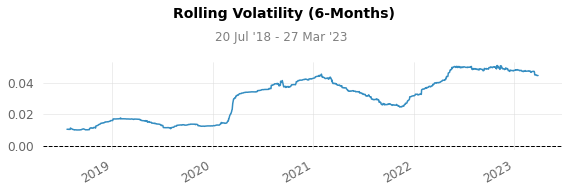

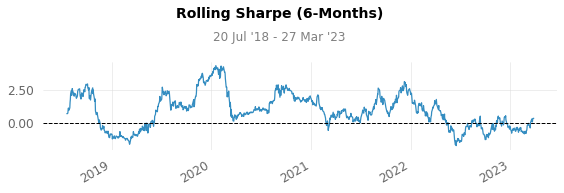

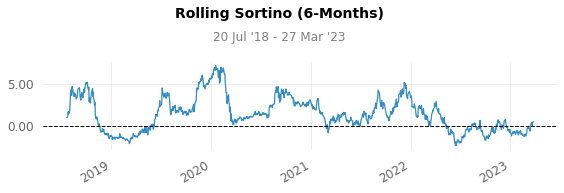

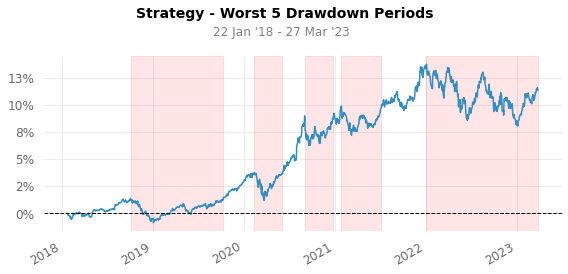

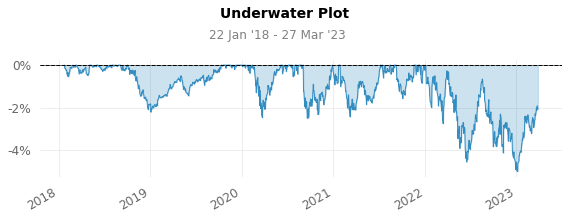

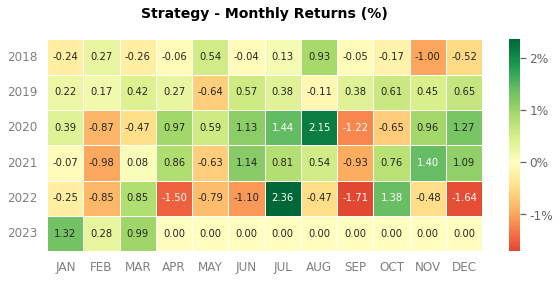

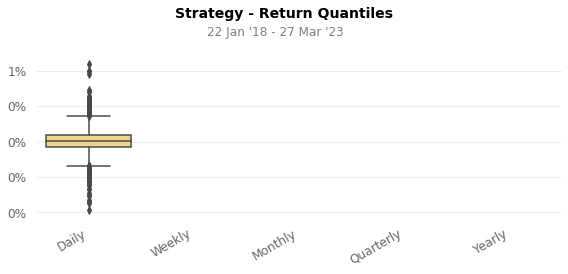

In [5]:
qs.reports.full(results.returns)

In [1]:
import pandas as pd
from quantstats import reports as rp
results=pd.read_csv('a.csv',index_col=0)
results.index=pd.to_datetime(results.index)

In [14]:
results

,period_open,period_close,transactions,positions,gross_leverage,starting_exposure,net_leverage,returns,ending_exposure,starting_value,...,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algo_volatility,benchmark_period_return,benchmark_volatility
2018-01-22 21:00:00+00:00,2018-01-22 14:31:00+00:00,2018-01-22 21:00:00+00:00,[],[],0.000000,0.0,0.000000,0.000000,0.0,0.0,...,NaN,0.000000,0.000000,0.0,0.0,1,2018-01,NaN,0.0,NaN
2018-01-23 21:00:00+00:00,2018-01-23 14:31:00+00:00,2018-01-23 21:00:00+00:00,"[{'amount': 100, 'dt': Timestamp('2018-01-23 2...","[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.044261,0.0,0.044261,-0.000023,4426.0,0.0,...,-11.224972,-0.000023,0.044261,0.0,0.0,2,2018-01,0.000260,0.0,0.0
2018-01-24 21:00:00+00:00,2018-01-24 14:31:00+00:00,2018-01-24 21:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.043587,4426.0,0.043587,-0.000705,4355.5,4426.0,...,-9.460749,-0.000728,0.044261,0.0,0.0,3,2018-01,0.006358,0.0,0.0
2018-01-25 21:00:00+00:00,2018-01-25 14:31:00+00:00,2018-01-25 21:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.042842,4355.5,0.042842,-0.000778,4277.8,4355.5,...,-11.383706,-0.001505,0.044261,0.0,0.0,4,2018-01,0.006706,0.0,0.0
2018-01-26 21:00:00+00:00,2018-01-26 14:31:00+00:00,2018-01-26 21:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.042937,4277.8,0.042937,0.000099,4287.7,4277.8,...,-9.511431,-0.001505,0.044261,0.0,0.0,5,2018-01,0.006718,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-21 20:00:00+00:00,2023-03-21 13:31:00+00:00,2023-03-21 20:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.142852,15740.0,0.142852,0.001689,15928.0,15740.0,...,0.951426,-0.050091,0.159977,0.0,0.0,1301,2023-03,0.032746,0.0,0.0
2023-03-22 20:00:00+00:00,2023-03-22 13:31:00+00:00,2023-03-22 20:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.141736,15928.0,0.141736,-0.001300,15783.0,15928.0,...,0.939682,-0.050091,0.159977,0.0,0.0,1302,2023-03,0.032739,0.0,0.0
2023-03-23 20:00:00+00:00,2023-03-23 13:31:00+00:00,2023-03-23 20:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.142583,15783.0,0.142583,0.000988,15893.0,15783.0,...,0.947732,-0.050091,0.159977,0.0,0.0,1303,2023-03,0.032729,0.0,0.0
2023-03-24 20:00:00+00:00,2023-03-24 13:31:00+00:00,2023-03-24 20:00:00+00:00,[],"[{'sid': Equity(3 [AAPL]), 'amount': 100, 'cos...",0.143597,15893.0,0.143597,0.001184,16025.0,15893.0,...,0.957448,-0.050091,0.159977,0.0,0.0,1304,2023-03,0.032720,0.0,0.0


In [4]:
results.columns

Index(['period_open', 'period_close', 'transactions', 'positions',
       'gross_leverage', 'starting_exposure', 'net_leverage', 'returns',
       'ending_exposure', 'starting_value', 'ending_value', 'starting_cash',
       'ending_cash', 'portfolio_value', 'longs_count', 'shorts_count',
       'long_value', 'short_value', 'long_exposure', 'pnl', 'short_exposure',
       'capital_used', 'orders', 'BTC', 'algorithm_period_return', 'alpha',
       'beta', 'sharpe', 'sortino', 'max_drawdown', 'max_leverage',
       'excess_return', 'treasury_period_return', 'trading_days',
       'period_label', 'algo_volatility', 'benchmark_period_return',
       'benchmark_volatility'],
      dtype='object')

                           Strategy
-------------------------  ----------
Start Period               2018-01-22
End Period                 2023-03-27
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          11.4%
CAGR﹪                     1.45%

Sharpe                     0.65
Prob. Sharpe Ratio         93.12%
Smart Sharpe               0.61
Sortino                    0.94
Smart Sortino              0.88
Sortino/√2                 0.67
Smart Sortino/√2           0.63
Omega                      1.13

Max Drawdown               -5.01%
Longest DD Days            447
Volatility (ann.)          3.27%
Calmar                     0.29
Skew                       -0.03
Kurtosis                   3.43

Expected Daily %           0.01%
Expected Monthly %         0.17%
Expected Yearly %          1.82%
Kelly Criterion            6.04%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.33%
Expected Shortfall (cVaR)  -0.33%

Max Consecutive Wins       11

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2023-01-05,2023-03-27,447,-5.009111,-4.605675
2,2020-09-02,2020-09-18,2020-12-24,113,-2.508494,-2.482804
3,2020-02-13,2020-03-23,2020-06-04,112,-2.477839,-2.360444
4,2021-01-27,2021-03-08,2021-07-06,160,-2.438854,-2.109427
5,2018-10-04,2019-01-03,2019-10-10,372,-2.216556,-2.066911


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


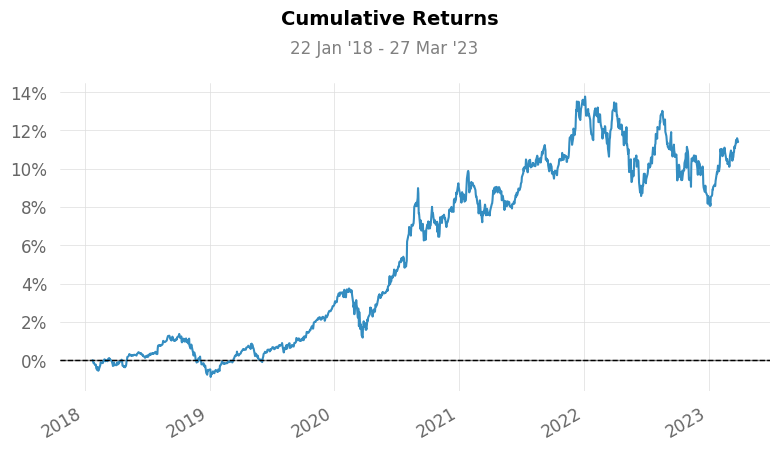

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


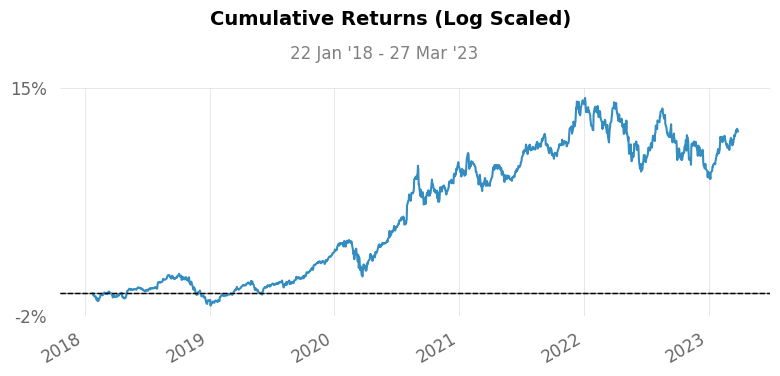

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


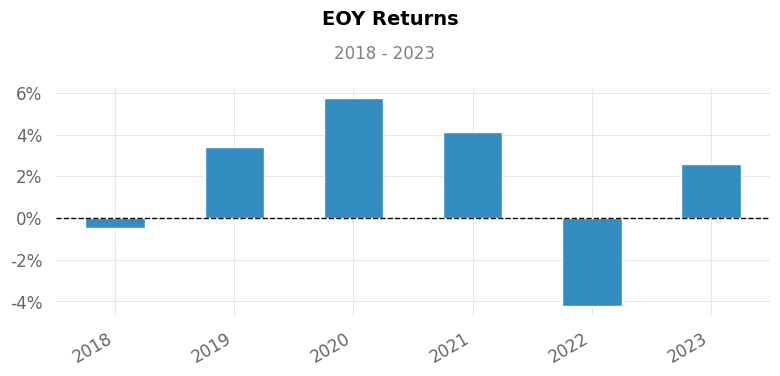

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


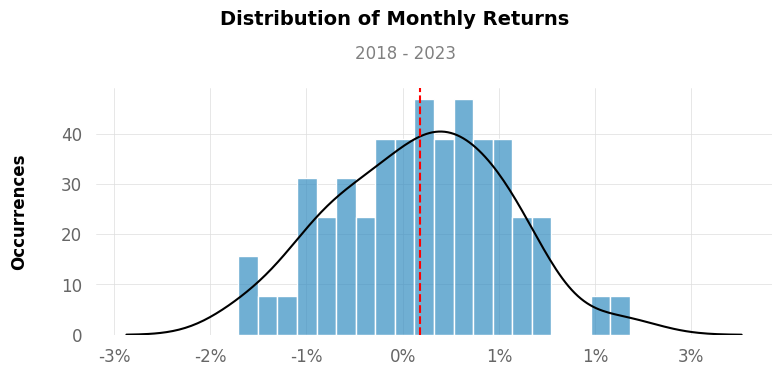

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


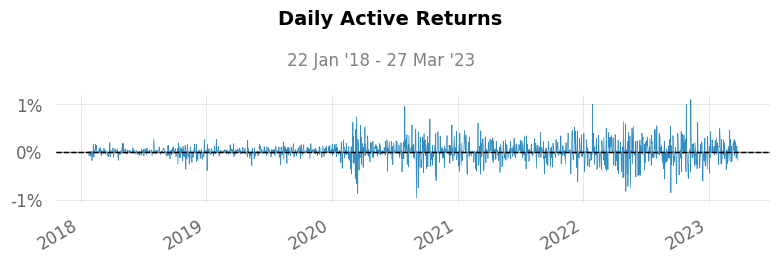

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


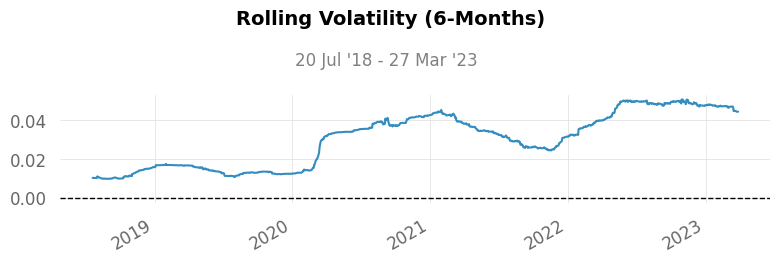

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


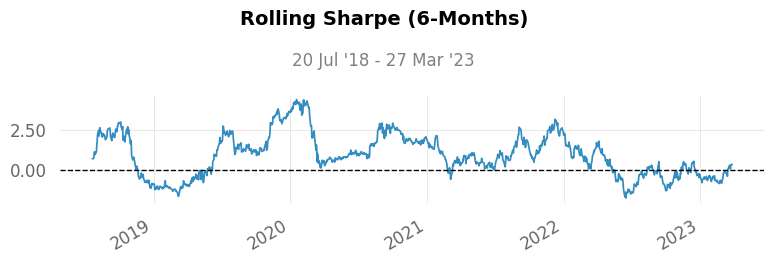

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


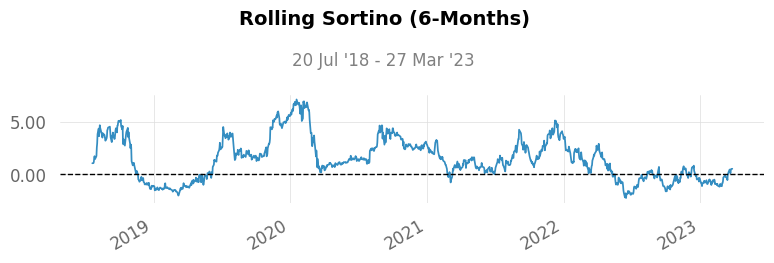

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


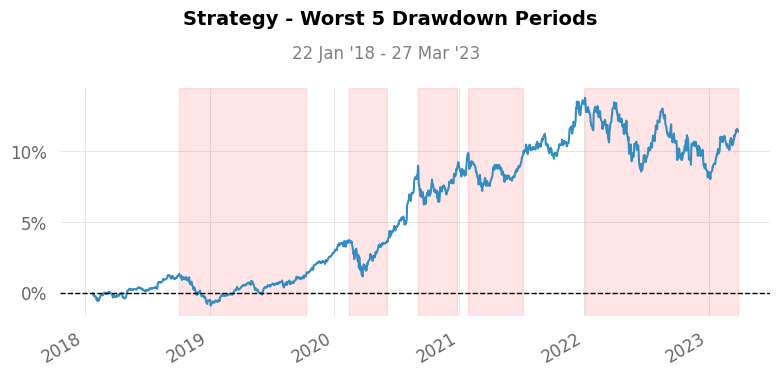

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


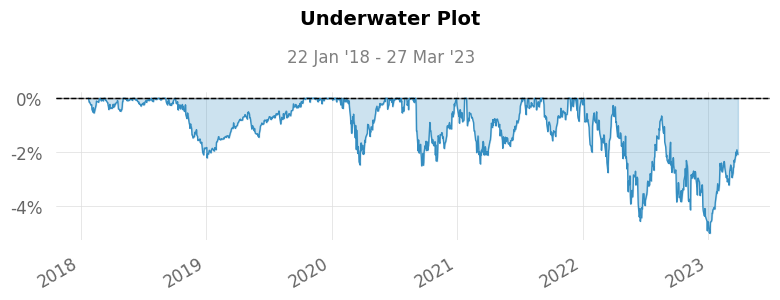

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


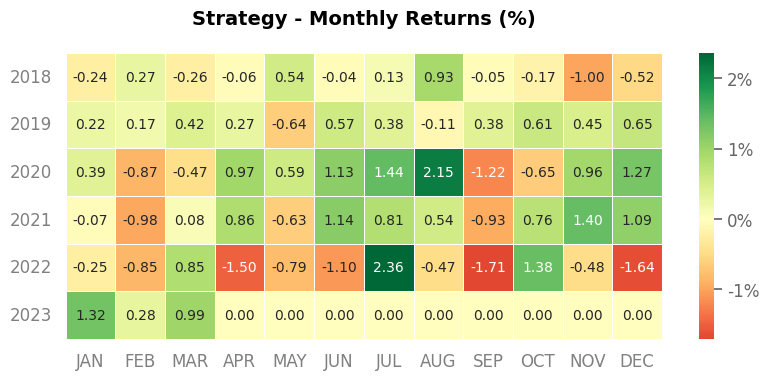

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


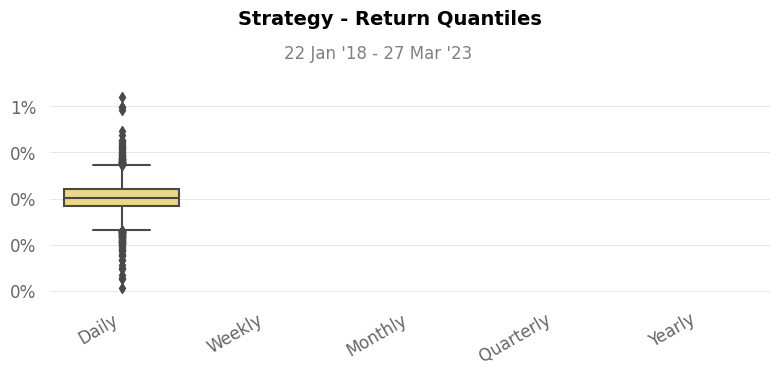

Average Long Exposure = 10078.048352490421
Average Short Exposure = 0.0
Average Net Leverage= 0.09365069499742412
Average Gross Leverage= 0.09365069499742412


                                                                                                                           positions
2018-01-22 21:00:00+00:00                                                                                                         []
2018-01-23 21:00:00+00:00               [{'sid': Equity(3 [AAPL]), 'amount': 100, 'cost_basis': 44.28313, 'last_sale_price': 44.26}]
2018-01-24 21:00:00+00:00              [{'sid': Equity(3 [AAPL]), 'amount': 100, 'cost_basis': 44.28313, 'last_sale_price': 43.555}]
2018-01-25 21:00:00+00:00              [{'sid': Equity(3 [AAPL]), 'amount': 100, 'cost_basis': 44.28313, 'last_sale_price': 42.778}]
2018-01-26 21:00:00+00:00              [{'sid': Equity(3 [AAPL]), 'amount': 100, 'cost_basis': 44.28313, 'last_sale_price': 42.877}]
2018-01-29 21:00:00+00:00               [{'sid': Equity(3 [AAPL]), 'amount': 100, 'cost_basis': 44.28313, 'last_sale_price': 41.99}]
2018-01-30 21:00:00+00:00              [{'sid': Equity(3 [AAPL]), 'am

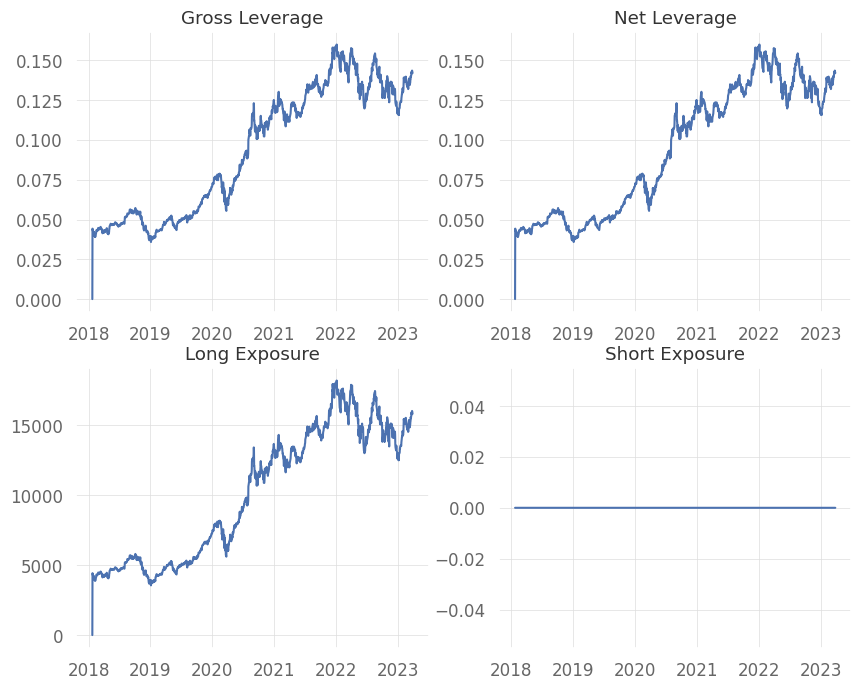

In [2]:
rp.full(results['returns'],df=results)

In [11]:
results.columns

Index(['period_open', 'period_close', 'transactions', 'positions',
       'gross_leverage', 'starting_exposure', 'net_leverage', 'returns',
       'ending_exposure', 'starting_value', 'ending_value', 'starting_cash',
       'ending_cash', 'portfolio_value', 'longs_count', 'shorts_count',
       'long_value', 'short_value', 'long_exposure', 'pnl', 'short_exposure',
       'capital_used', 'orders', 'BTC', 'algorithm_period_return', 'alpha',
       'beta', 'sharpe', 'sortino', 'max_drawdown', 'max_leverage',
       'excess_return', 'treasury_period_return', 'trading_days',
       'period_label', 'algo_volatility', 'benchmark_period_return',
       'benchmark_volatility'],
      dtype='object')

                           Strategy
-------------------------  ----------
Start Period               2018-01-22
End Period                 2023-03-27
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          11.4%
CAGR﹪                     1.45%

Sharpe                     0.65
Prob. Sharpe Ratio         93.12%
Smart Sharpe               0.61
Sortino                    0.94
Smart Sortino              0.88
Sortino/√2                 0.67
Smart Sortino/√2           0.63
Omega                      1.13

Max Drawdown               -5.01%
Longest DD Days            447
Volatility (ann.)          3.27%
Calmar                     0.29
Skew                       -0.03
Kurtosis                   3.43

Expected Daily %           0.01%
Expected Monthly %         0.17%
Expected Yearly %          1.82%
Kelly Criterion            6.04%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.33%
Expected Shortfall (cVaR)  -0.33%

Max Consecutive Wins       11

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2023-01-05,2023-03-27,447,-5.009111,-4.605675
2,2020-09-02,2020-09-18,2020-12-24,113,-2.508494,-2.482804
3,2020-02-13,2020-03-23,2020-06-04,112,-2.477839,-2.360444
4,2021-01-27,2021-03-08,2021-07-06,160,-2.438854,-2.109427
5,2018-10-04,2019-01-03,2019-10-10,372,-2.216556,-2.066911


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


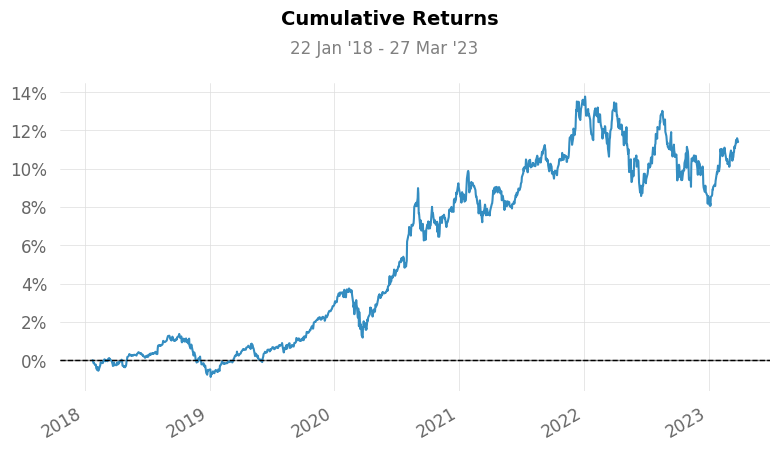

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


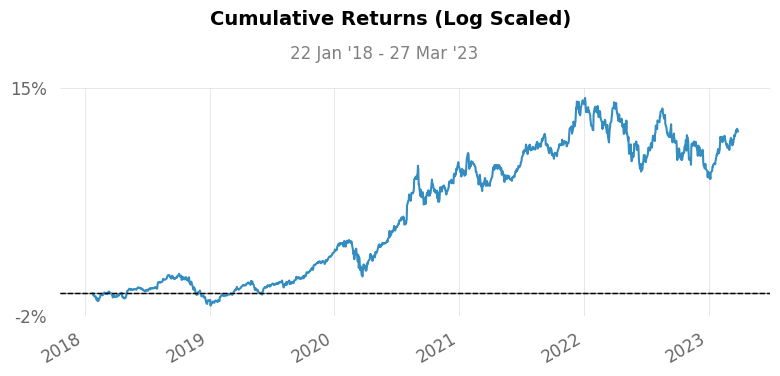

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


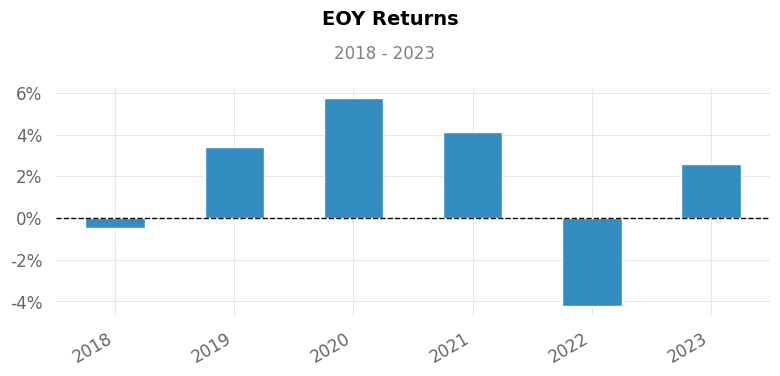

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


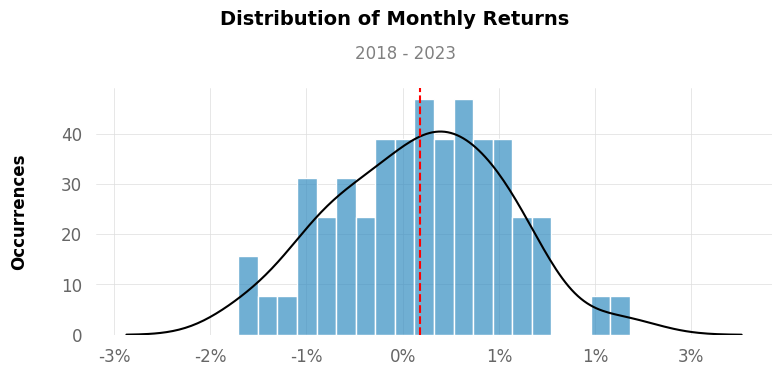

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


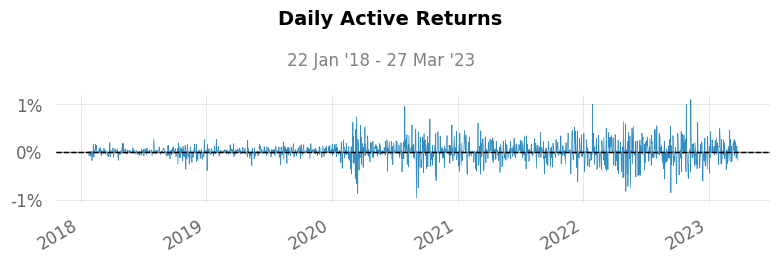

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


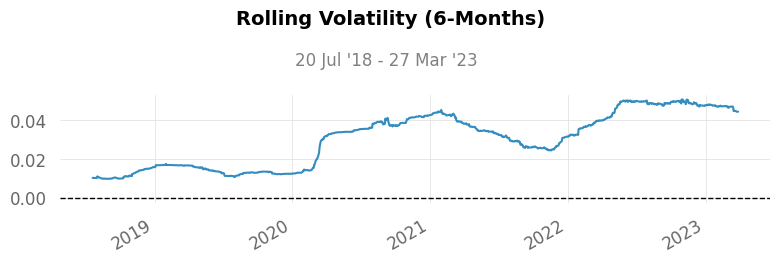

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


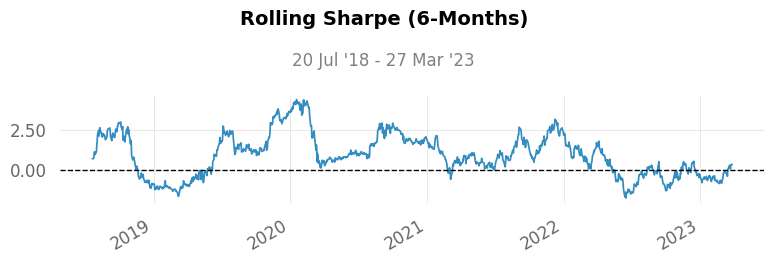

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


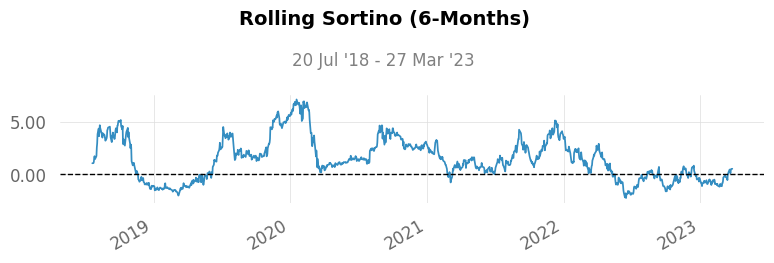

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


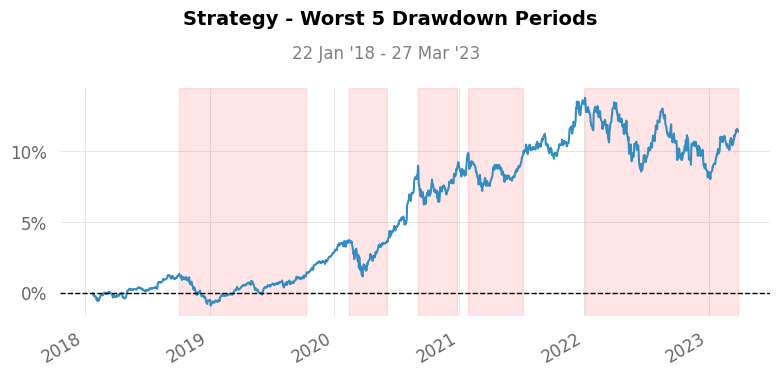

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


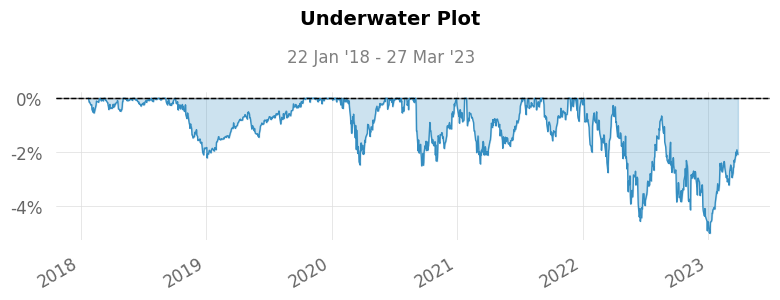

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


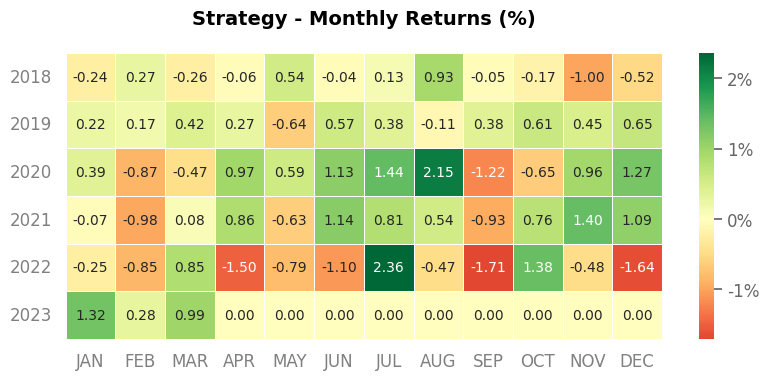

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


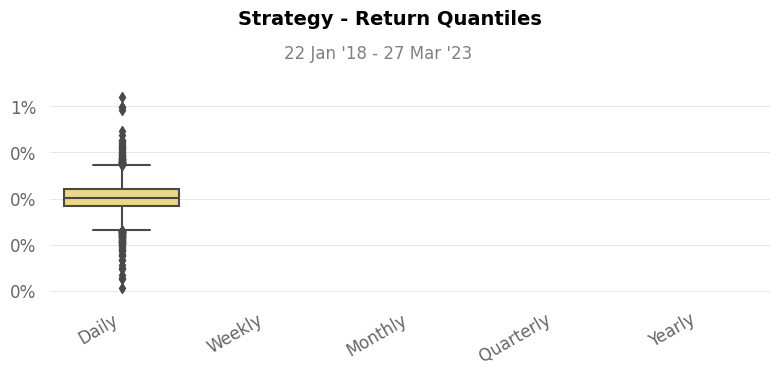

In [4]:
rp.full(results['returns'])